# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = soup.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_list = []
# Loop through the scraped data to create a list of rows
for row in table_rows:
    column = row.find_all('td')
    data_dict = {}
    data_dict['id'] = column[0].text
    data_dict['terrestrial_date'] = column[1].text
    data_dict['sol'] = column[2].text
    data_dict['ls'] = column[3].text
    data_dict['month'] = column[4].text
    data_dict['min_temp'] = column[5].text
    data_dict['pressure'] = column[6].text
    data_list.append(data_dict)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
data_df = pd.DataFrame(data_list)

In [8]:
# Confirm DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
data_df['terrestrial_date'] = pd.to_datetime(data_df['terrestrial_date'])
data_df = data_df.astype({'sol': 'int64', 'ls': 'int64', 'month': 'int64', 'min_temp': 'float64', 'pressure': 'float'})

In [11]:
# Confirm type changes were successful by examining data types again
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?  
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

#### Analysis/Responses to 5 Questions
1. There are 12 months on Mars
2. THe dataset contains 1867 days worth of data.
3. On average, the 3rd month is the coldest and the 8th month is the hottest.
4. On average, the 6th month has the lowest atmospheric pressure and the 9th month has the highest.
5. Per Nasa (https://www.jpl.nasa.gov/edu/learn/video/mars-in-a-minute-how-long-is-a-year-on-mars/), Mars orbits the sun every 687 Earth days. In looking at the minimum temperature by day for the entire dataset, there were 3 peaks in temperature roughly indicating Martian summer based on the tilt of the planet. In looking at a temperature range for the last 2 peaks, the difference in the median day was 656 days. Based on a visual estimate, the difference in days was 675.

In [12]:
# 1. How many months are there on Mars?

print(f"There are {data_df['month'].max()} months on Mars.")
data_df.groupby(['month']).size()

There are 12 months on Mars.


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?

print(f'There are {len(data_df)} Martian days worth of data.')

There are 1867 Martian days worth of data.


In [14]:
# 3. What is the average low temperature by month?

# Create group object with month and average low temperature
avg_temp = data_df.groupby(['month'])['min_temp'].mean()

# Print heading and group object
print('Average low temperature by Martian month:')
avg_temp

Average low temperature by Martian month:


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

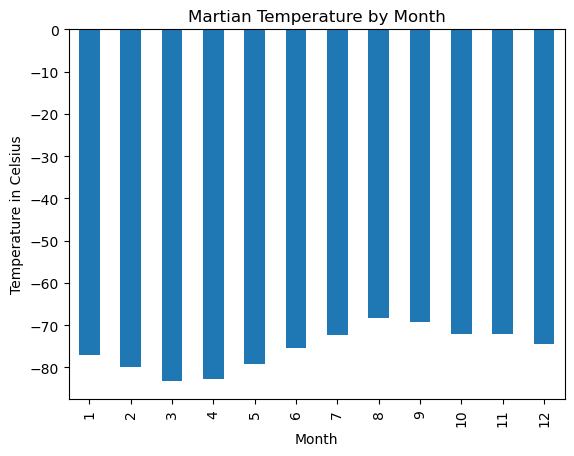

In [15]:
# Plot the average temperature by month

# Create group object with month and average temperature
avg_temp = data_df[['month', 'min_temp']].groupby(['month']).mean()

# Plot dataframe
fig1 = avg_temp.plot(kind='bar', title='Martian Temperature by Month',
                        xlabel='Month', ylabel='Temperature in Celsius',
                        legend=False) # legend unneeded as there is only temperature is plotted

Coldest month: 3
Hottest month: 8


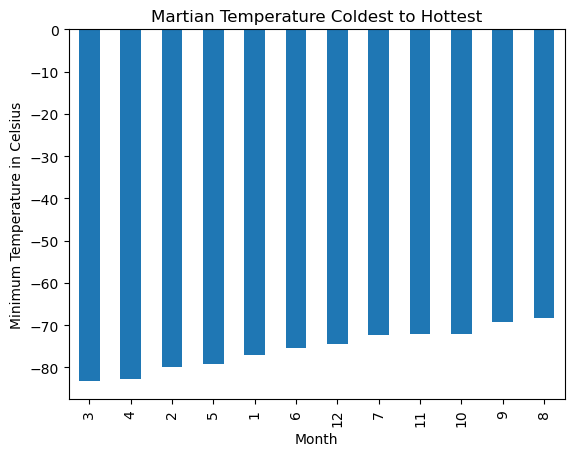

In [18]:
# Identify the coldest and hottest months in Curiosity's location

# Create dataframe with months sorted ascending by temperature
avg_temp_sorted_df = avg_temp.sort_values(by='min_temp')

# Print coldest and hottest months and plot dataframe
print(f'Coldest month: {avg_temp_sorted_df.index[0]}')
print(f'Hottest month: {avg_temp_sorted_df.index[11]}')
fig2 = avg_temp_sorted_df.plot(kind='bar', title='Martian Temperature Coldest to Hottest',
                        xlabel='Month', ylabel='Minimum Temperature in Celsius',
                        legend=False)

In [19]:
# 4. Average pressure by Martian month

# Create group object with month and average pressure
avg_pressure = data_df.groupby(['month'])['pressure'].mean()

# Print heading and group object
print('Average pressure by Martian month')
avg_pressure

Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

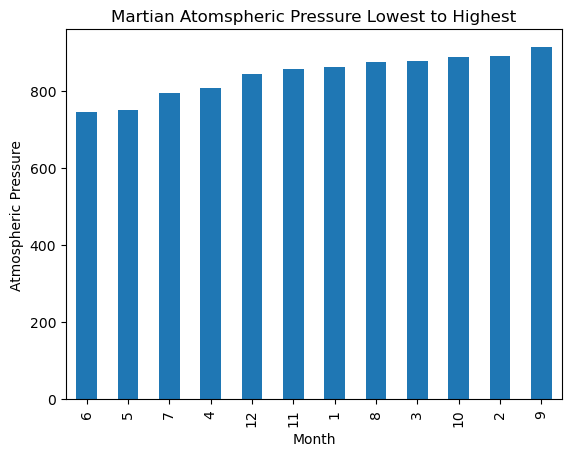

In [20]:
# Plot the average pressure by month

# Create dataframe with month and average pressure sorted ascending
avg_pressure = (data_df[['month', 'pressure']].groupby(['month']).\
                   mean().sort_values(by='pressure'))

# Plot dataframe
fig3 = avg_pressure.plot(kind='bar', title='Martian Atomspheric Pressure Lowest to Highest',
                            xlabel='Month', ylabel='Atmospheric Pressure', legend=False)

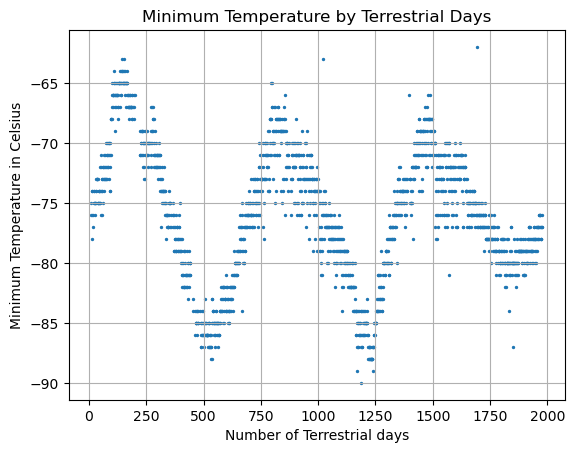

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Simple scatter plot
fig4 = data_df.plot.scatter(x='sol', y='min_temp', s=2,
                            title='Minimum Temperature by Terrestrial Days',
                            xlabel='Number of Terrestrial days',
                            ylabel='Minimum Temperature in Celsius',
                            grid=True
                           )

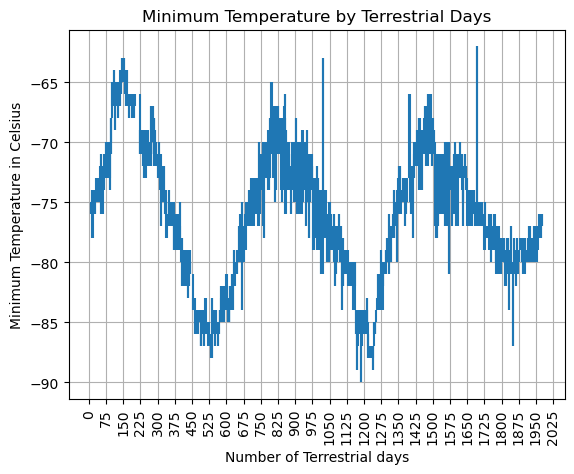

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?\

# Vlines scatter plot - This plot creates a vertical line between each temperature value

# Define x, ymin, and ymax values for vlines
x = data_df['sol']
ymin = []
ymax = []
yprev = 0

# Cycle through dataframe and store values for ymin and ymax
for row in range(0,len(data_df)):

    y = data_df.iloc[row,5] # Set y to min_temp
    if yprev == 0: # Set ymin and ymax for first day
        max = y
        min = y - 1
    elif y < yprev:
        max = yprev
        min = y
    else:
        max = y
        min = yprev
    yprev = y
    ymin.append(min)
    ymax.append(max)

# PLot the data
fig5 = plt.vlines(x, ymin, ymax)
plt.title('Minimum Temperature by Terrestrial Days')
plt.xlabel('Number of Terrestrial days')
plt.ylabel('Minimum Temperature in Celsius')
xticks = range(0, 2050, 75)
plt.xticks(xticks, rotation=90)
plt.grid(axis='both')

In [24]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Create dataframe to isolate hottest days around peaks 2
# The temperature range was chosen to minimize the effect of several outlier temperatures
peak_2 = data_df[(data_df['min_temp'] > -69) & (data_df['min_temp'] < -64) &
                       (data_df['sol'] > 500) & (data_df['sol'] < 1250)
                      ]
peak_3 = data_df[(data_df['min_temp'] > -69) & (data_df['min_temp'] < -64) &
                       (data_df['sol'] > 1250)
                      ]

print(f'Peak 2: Average of Terrestrial Days: {peak_2["sol"].mean()}')
print(f'Peak 2: Median of Terrestrial Days: {peak_2["sol"].median()}\n')
print(f'Peak 3: Average of Terrestrial Days: {peak_3["sol"].mean()}')
print(f'Peak 3: Median of Terrestrial Days: {peak_3["sol"].median()}\n')
print(f'Days between Peaks (Average): {peak_3["sol"].mean() - peak_2["sol"].mean()}')
print(f'Days between Peaks (Median): {peak_3["sol"].median() - peak_2["sol"].median()}\n')
print(f'Days based on visual estimate: 1500-825={1500-825}')

Peak 2: Average of Terrestrial Days: 822.6666666666666
Peak 2: Median of Terrestrial Days: 822.5

Peak 3: Average of Terrestrial Days: 1472.3636363636363
Peak 3: Median of Terrestrial Days: 1478.5

Days between Peaks (Average): 649.6969696969696
Days between Peaks (Median): 656.0

Days based on visual estimate: 1500-825=675


#### Note: The section below was in the original starter code.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
data_df.to_csv('mars_weather_data.csv', index=False, header=True)

In [26]:
browser.quit()